In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Keras/Diabetes Binary Classification.csv')

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

,0
Number of times pregnant,0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0
Diastolic blood pressure (mm Hg),0
Triceps skin fold thickness (mm),0
2-Hour serum insulin (mu U/ml),0
Body mass index (weight in kg/(height in m)^2),0
Diabetes pedigree function,0
Age (years),0
Class variable (0 or 1),0


In [5]:
X = df.drop(columns='Class variable (0 or 1)')
y = df['Class variable (0 or 1)']
X = X.values
y = y.values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L2 Regularization

In [8]:
model = Sequential()

model.add(Dense(16, input_shape=(8,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5575 - loss: 0.7171 - val_accuracy: 0.7078 - val_loss: 0.6485
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6591 - loss: 0.6538 - val_accuracy: 0.7078 - val_loss: 0.6006
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7039 - loss: 0.5977 - val_accuracy: 0.7468 - val_loss: 0.5654
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7208 - loss: 0.5856 - val_accuracy: 0.7597 - val_loss: 0.5414
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7540 - loss: 0.5535 - val_accuracy: 0.7597 - val_loss: 0.5228
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7336 - loss: 0.5402 - val_accuracy: 0.7727 - val_loss: 0.5123
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7710 - loss: 0.5125 - val_accuracy: 0.7792 - val_loss: 0.5056
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7394 - loss: 0.5386 - val_accuracy: 0.

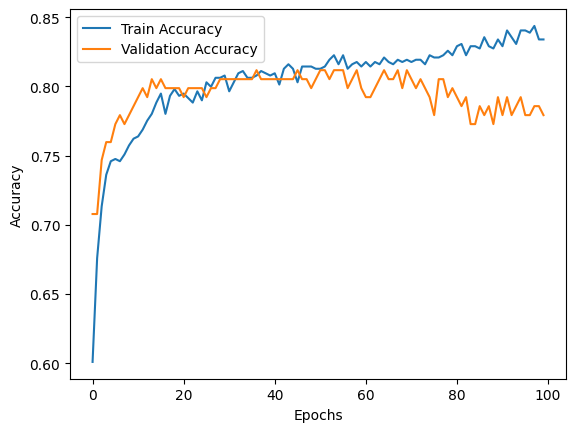

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# L1 Regularization

In [12]:
model1 = Sequential()

model1.add(Dense(16, input_shape=(8,), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(1, activation='sigmoid'))

In [13]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history1 = model1.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4148 - loss: 0.9067 - val_accuracy: 0.6299 - val_loss: 0.8277
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6872 - loss: 0.8065 - val_accuracy: 0.6948 - val_loss: 0.7610
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7178 - loss: 0.7490 - val_accuracy: 0.7468 - val_loss: 0.7161
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7520 - loss: 0.7186 - val_accuracy: 0.7532 - val_loss: 0.6832
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7433 - loss: 0.6917 - val_accuracy: 0.7468 - val_loss: 0.6601
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7431 - loss: 0.6802 - val_accuracy: 0.7662 - val_loss: 0.6414
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7546 - loss: 0.6451 - val_accuracy: 0.7727 - val_loss: 0.6294
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7602 - loss: 0.6406 - val_accuracy: 0.7662

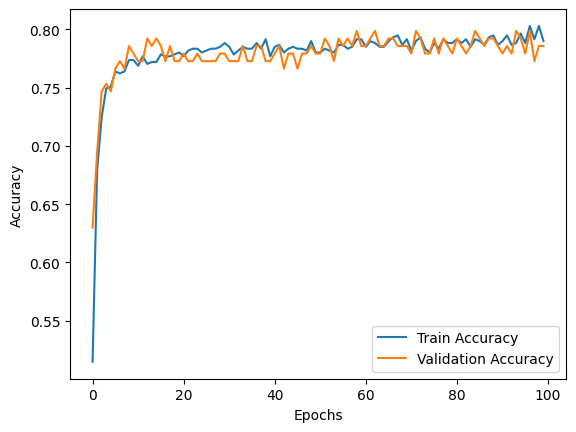

In [15]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ElasticNet Regularization





In [16]:
model2 = Sequential()

model2.add(Dense(16, input_shape=(8,), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-3)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-3)))
model2.add(Dense(1, activation='sigmoid'))

In [17]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history2 = model2.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6140 - loss: 0.7110 - val_accuracy: 0.6558 - val_loss: 0.6286
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6674 - loss: 0.6381 - val_accuracy: 0.7208 - val_loss: 0.5768
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7128 - loss: 0.6005 - val_accuracy: 0.7792 - val_loss: 0.5443
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7418 - loss: 0.5567 - val_accuracy: 0.7857 - val_loss: 0.5206
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7553 - loss: 0.5463 - val_accuracy: 0.7987 - val_loss: 0.5026
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7543 - loss: 0.5485 - val_accuracy: 0.7987 - val_loss: 0.4899
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7653 - loss: 0.5298 - val_accuracy: 0.7987 - val_loss: 0.4897
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7762 - loss: 0.5020 - val_accuracy: 0.8117 - 

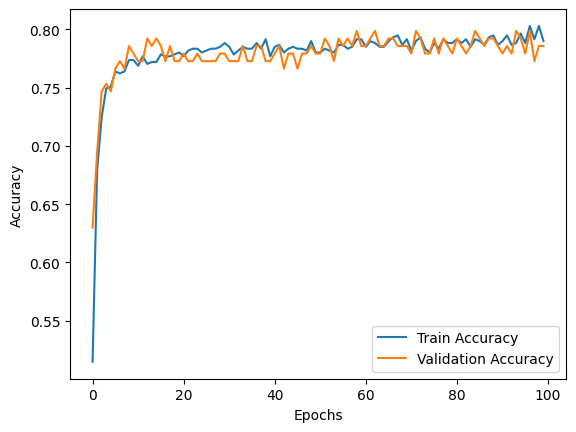

In [19]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()